In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

In [2]:
ratings_data=pd.read_csv("ratings_Clothing_Shoes_and_Jewelry.csv",names=['userId', 'productId','Rating','timestamp'])
ratings_data.drop(['timestamp'], axis=1,inplace=True)

In [3]:
ratings_data.head(15)

,userId,productId,Rating
0,A2XVJBSRI3SWDI,0000031887,5.0
1,A2G0LNLN79Q6HR,0000031887,4.0
2,A2R3K1KX09QBYP,0000031887,2.0
3,A19PBP93OF896,0000031887,1.0
4,A1P0IHU93EF9ZK,0000031887,4.0
5,A3Q6CTO56DJ8UZ,0000031887,4.0
6,A1KLRMWW2FWPL4,0000031887,5.0
7,A1GQPAM8Y45QN7,0000031887,5.0
8,A2G5TCU2WDFZ65,0000031887,5.0
9,AEAN37KUOYSX4,0000031887,5.0


In [4]:
ratings_data.shape

(5748920, 3)

In [5]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748920 entries, 0 to 5748919
Data columns (total 3 columns):
userId       object
productId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 131.6+ MB


In [6]:
ratings_data.describe()['Rating'].T

count    5.748920e+06
mean     4.144679e+00
std      1.233103e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1350844f710>,
 'caps': [<matplotlib.lines.Line2D at 0x1350844fda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1350844f2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x13508464470>],
 'fliers': [<matplotlib.lines.Line2D at 0x135084647b8>],
 'means': []}

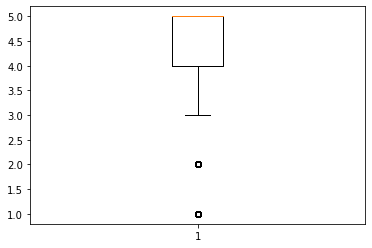

In [7]:
plt.boxplot(ratings_data['Rating'])

In [8]:
ratings_data.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

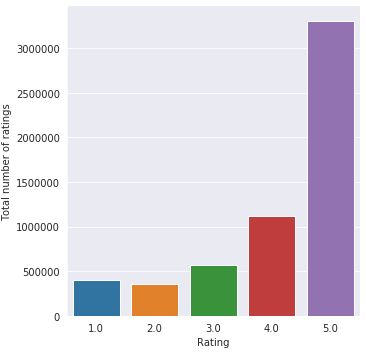

In [9]:
with sns.axes_style('darkgrid'):
    rating_plot = sns.catplot("Rating", data=ratings_data, kind='count')
    rating_plot.set_ylabels("Total number of ratings")

In [10]:
print("Total no of ratings :",ratings_data.shape[0])
print("Total No of unique users   :", len(np.unique(ratings_data.userId)))
print("Total No of unique products  :", len(np.unique(ratings_data.productId)))

Total no of ratings : 5748920
Total No of unique users   : 3117268
Total No of unique products  : 1136004


In [11]:
user_diversity_scan= ratings_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

user_diversity_scan.head(10)

userId
A3W4D8XOGLWUN5    349
A5QQRB2QOY96U     289
A2KBV88FL48CFS    278
A1Z4LX3Q1YMF84    274
A1RRMZKOMZ2M7J    259
A2J4XMWKR8PPD0    256
A2EA0JE6LV4BXH    249
A2GA55P7WGHJCP    240
A1XQ0F01CF84Y3    225
A29BPMJI0ZYH4H    197
Name: Rating, dtype: int64

In [12]:
user_diversity_scan.tail(10)

userId
A39NIYCJLGWPQ            1
A39NIPDP99E6BO           1
A39NIL48689N78           1
A39NIIUZYLV875           1
A39NIHHIV1YB5I           1
A39NI5DLRB306C           1
A39NI4NAMU8Q90           1
A39NI0FS63CQ28           1
A39NHWRT04N6KQ           1
A000008615DZQRRI946FO    1
Name: Rating, dtype: int64

In [13]:
user_diversity_scan.describe()

count    3.117268e+06
mean     1.844217e+00
std      2.448089e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.490000e+02
Name: Rating, dtype: float64

In [14]:
print(' No of users who rated more than 100 items : {}'.format(sum(user_diversity_scan >= 100)))

 No of users who rated more than 100 items : 69


In [15]:
product_popularity_scan= ratings_data.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

product_popularity_scan.head(10)

productId
B0058XIMMM    3047
B000FBO0DM    2836
B000NZW3J8    2797
B005LERHD8    2781
B006PGGJOE    2773
B000T9VK56    2685
B00012O12A    2214
B0000C321X    2105
B000O32MLI    2057
B000XDDERK    1861
Name: Rating, dtype: int64

In [16]:
product_popularity_scan.describe()

count    1.136004e+06
mean     5.060651e+00
std      2.326025e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      3.047000e+03
Name: Rating, dtype: float64

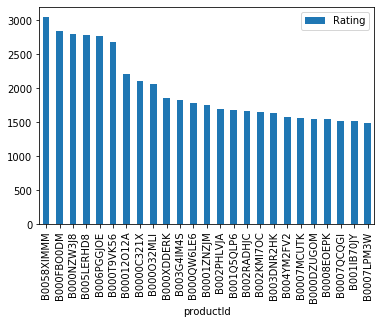

In [17]:
maximum_rated_products = pd.DataFrame(ratings_data.groupby('productId')['Rating'].count())
popularity_based_recommendations = maximum_rated_products.sort_values('Rating', ascending=False)
popularity_based_recommendations.head(25).plot(kind = "bar")

In [18]:
product_database=ratings_data.groupby("productId").filter(lambda x:x['Rating'].count() >=500)

In [19]:
ratings_per_product = product_database.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

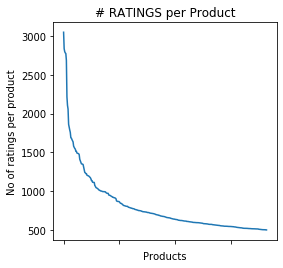

In [20]:

figure = plt.figure(figsize=plt.figaspect(1))
ax = plt.gca()
plt.plot(ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Products')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [21]:
product_database.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B008KK0ZJ8    4.818489
B000XPIZPE    4.776824
B0013KDS96    4.753469
B009ZDEXQK    4.727639
B000EIJG0I    4.721457
Name: Rating, dtype: float64

In [22]:
mean_ratings = pd.DataFrame(product_database.groupby('productId')['Rating'].mean())
mean_ratings['rating_counts'] = pd.DataFrame(product_database.groupby('productId')['Rating'].count())
mean_ratings.head()

,Rating,rating_counts
productId,,
B00005TQI7,4.497537,609
B00006XXGO,4.518791,1224
B000072UMJ,4.501527,1310
B000074RL3,4.502783,539
B000086910,4.009398,532


<Figure size 720x540 with 0 Axes>

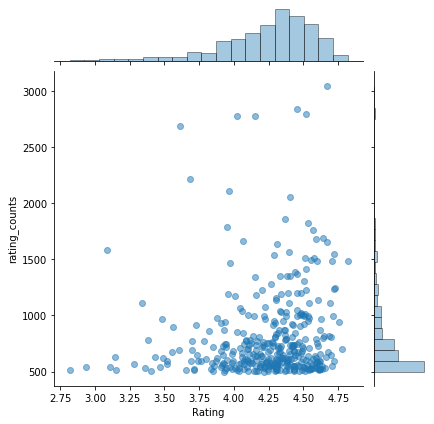

In [23]:
plt.figure(figsize=(10,7.5))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=mean_ratings, alpha=0.5)

In [24]:
collaborative_recommending_matrix = product_database.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
collaborative_recommending_matrix.head()

productId,B00005TQI7,B00006XXGO,B000072UMJ,B000074RL3,B000086910,B00009ZM7Z,B0000ANHST,B0000AT7N2,B0000ATP8L,B0000C321X,...,B00BKEQBI0,B00BXH3ZMO,B00CIBCJ62,B00CKGB85I,B00D1MR8YU,B00D86D4L0,B00DNQIIE8,B00DQYNS3I,B00DSV2ESE,B00FJ5LI3O
userId,,,,,,,,,,,,,,,,,,,,,
A0002696N8BSFGJBGVFN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00064201V77I44TYDVC9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A000979615F1DW010JA4U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A001114613O3F18Q5NVR6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00115942KQCYA4V5THGW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
collaborative_recommending_matrix.shape

(276262, 365)

In [26]:
product_based_matrix = collaborative_recommending_matrix.T
product_based_matrix.head()

userId,A0002696N8BSFGJBGVFN,A00064201V77I44TYDVC9,A000979615F1DW010JA4U,A001114613O3F18Q5NVR6,A00115942KQCYA4V5THGW,A00123503TDGU55J1GVO6,A0015694335OXH5GUHFTH,A00182301XMDX20WTL4DB,A002043023IWSITS68QKB,A00219682P7VSC0F8HLCU,...,AZZT1ERHBSNQ8,AZZTNXCPKZKGZ,AZZTOUKVTUMVM,AZZU6NXB8YJN9,AZZUJP2VVO8A5,AZZVXTYIUGMBH,AZZW5X2SP48SI,AZZW7QHJZP3TY,AZZWQ3PROSDHL,AZZY5UXXCEH60
productId,,,,,,,,,,,,,,,,,,,,,
B00005TQI7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00006XXGO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000072UMJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000074RL3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000086910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(product_based_matrix)
reduced_matrix.shape

(365, 10)

In [28]:
correlation_data = np.corrcoef(reduced_matrix)
correlation_data.shape

(365, 365)

In [33]:
product_based_matrix.index[24]

'B0006LMBJ6'

In [30]:
i = product_based_matrix.index[24]

product_names = list(product_based_matrix.index)
product_ID = product_names.index(i)
product_ID


24

In [31]:
correlation_product_ID = correlation_data[product_ID]
correlation_product_ID.shape

(365,)

In [32]:
Recommend = list(product_based_matrix.index[correlation_product_ID > 0.90])


Recommend.remove(i) 

Recommend[0:9]

['B00012O12A',
 'B0007XA0FU',
 'B002KMI7OC',
 'B004A7YLN6',
 'B004HHUNI6',
 'B0051D7GF8']